<a href="https://colab.research.google.com/github/LucasHenrique-dev/Modelagem-Analitica/blob/main/previsao_series_temporais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GERENCIAR BIBLIOTECAS

## INSTALAR BIBLIOTECAS

In [1]:
!pip install gdown

## IMPORTS

In [2]:
# UPLOAD DO BANCO DE DADOS
import gdown
# MANIPULAÇÃO DOS DADOS
import pandas as pd
import numpy as np
# VISUALIZAÇÃO DOS DADOS
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
# ESTUDO DA SÉRIE TEMPORAL
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

# COLETA DE DADOS

In [3]:
# Defina o link de compartilhamento do Google Drive
link_compartilhamento = "https://drive.google.com/uc?id=1SwvAsSuRdBYYJ4NOL_gqq9lr2A80kgyf"

# Nome do arquivo de saída após o download
nome_arquivo_saida = "boa_esperanca.xlsx"

# Faça o download do arquivo do Google Drive usando o link de compartilhamento
gdown.download(link_compartilhamento, nome_arquivo_saida, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1SwvAsSuRdBYYJ4NOL_gqq9lr2A80kgyf
To: /content/boa_esperanca.xlsx
100%|██████████| 15.7k/15.7k [00:00<00:00, 9.19MB/s]


'boa_esperanca.xlsx'

# TRATAR DADOS

In [4]:
dados = pd.read_excel('/content/boa_esperanca.xlsx')

dados.head()

,BOA ESPERANÇA (190),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,ANO,JAN,FEV,MAR,ABR,MAI,JUN,JUL,AGO,SET,OUT,NOV,DEZ
1,1931,452,796,804,644,421,305,261,246,250,328,319,335
2,1932,467,531,501,547,363,281,263,245,363,325,310,362
3,1933,706,824,895,871,434,306,261,246,200,288,528,821
4,1934,936,967,1007,653,454,269,229,234,252,275,510,938


## RENOMEAR COLUNAS

In [5]:
colunas = dados.columns

colunas

Index(['BOA ESPERANÇA (190)', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12'],
      dtype='object')

In [6]:
dados[0:1]

,BOA ESPERANÇA (190),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,ANO,JAN,FEV,MAR,ABR,MAI,JUN,JUL,AGO,SET,OUT,NOV,DEZ


In [7]:
novas_colunas = {}
meses = {'JAN': '01', 'FEV': '02', 'MAR': '03', 'ABR': '04', 'MAI': '05',
         'JUN': '06', 'JUL': '07', 'AGO': '08', 'SET': '09', 'OUT': '10',
         'NOV': '11', 'DEZ': '12'}

novas_colunas['BOA ESPERANÇA (190)'] = 'ANO'

for coluna in colunas[1:]:
   novas_colunas[coluna] = meses[dados[coluna][0]]

novas_colunas

{'BOA ESPERANÇA (190)': 'ANO',
 'Unnamed: 1': '01',
 'Unnamed: 2': '02',
 'Unnamed: 3': '03',
 'Unnamed: 4': '04',
 'Unnamed: 5': '05',
 'Unnamed: 6': '06',
 'Unnamed: 7': '07',
 'Unnamed: 8': '08',
 'Unnamed: 9': '09',
 'Unnamed: 10': '10',
 'Unnamed: 11': '11',
 'Unnamed: 12': '12'}

In [8]:
dados.rename(columns=novas_colunas, inplace=True)
dados = dados.iloc[1:].copy()

dados.head()

,ANO,01,02,03,04,05,06,07,08,09,10,11,12
1,1931,452,796,804,644,421,305,261,246,250,328,319,335
2,1932,467,531,501,547,363,281,263,245,363,325,310,362
3,1933,706,824,895,871,434,306,261,246,200,288,528,821
4,1934,936,967,1007,653,454,269,229,234,252,275,510,938
5,1935,997,858,792,986,654,356,250,216,198,336,518,680


## ALTERAR ESTRUTURA

In [9]:
# Converter a coluna 'ANO' para string antes de alterar estrutura
dados['ANO'] = dados['ANO'].astype(str)

In [10]:
# Transformar os dados no formato desejado
melted_df = dados.melt(id_vars=['ANO'], var_name='MES', value_name='VAZAO')
melted_df['DATA'] = pd.to_datetime(melted_df['ANO'] + '-' + melted_df['MES'] + '-01')

# Ordenar os dados pela coluna DATA
serie_boa_esperanca = melted_df.sort_values(by=['ANO', 'MES'])
serie_boa_esperanca.reset_index(drop=True, inplace=True)
serie_boa_esperanca = serie_boa_esperanca[['DATA', 'VAZAO']]

serie_boa_esperanca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1032 entries, 0 to 1031
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATA    1032 non-null   datetime64[ns]
 1   VAZAO   1032 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 16.2+ KB


In [11]:
serie_boa_esperanca.head()

,DATA,VAZAO
0,1931-01-01,452
1,1931-02-01,796
2,1931-03-01,804
3,1931-04-01,644
4,1931-05-01,421


# EXIBIR OS DADOS

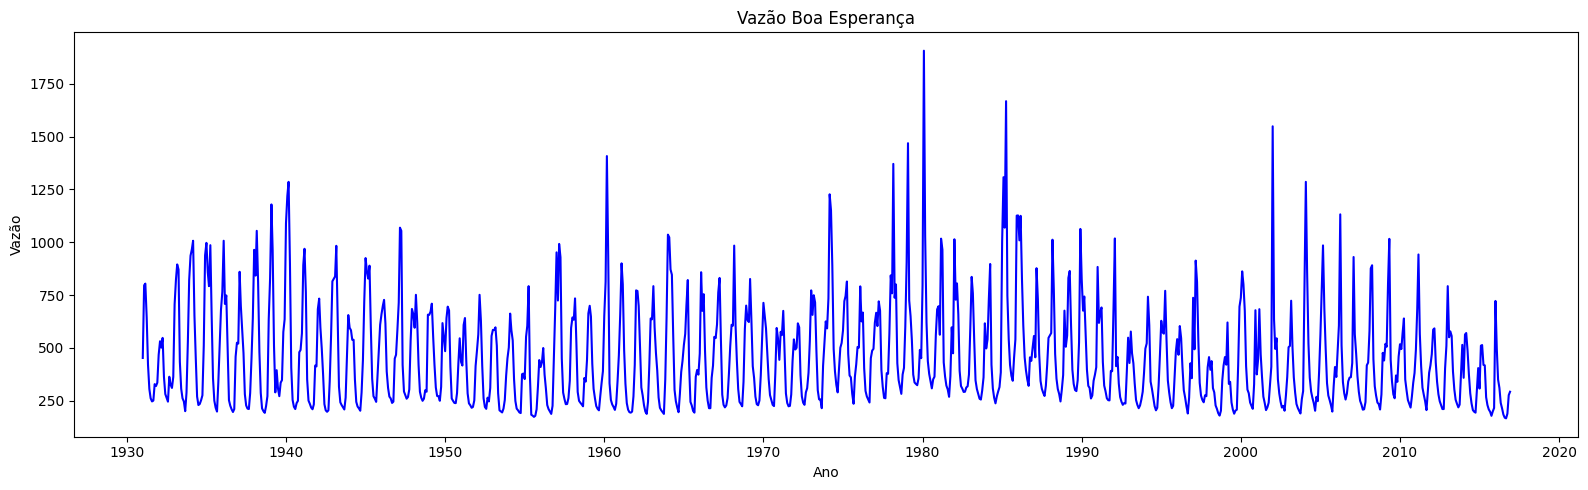

In [12]:
# Tamanho do gráfico
plt.figure(figsize=(16, 5))

# Plotar o gráfico de linha usando o método plot() do Pandas
eixo_x = serie_boa_esperanca['DATA']
eixo_y = serie_boa_esperanca['VAZAO']

plt.plot(eixo_x, eixo_y, linestyle='-', color='b')

# Adicionar títulos e rótulos dos eixos
plt.title('Vazão Boa Esperança')
plt.xlabel('Ano')
plt.ylabel('Vazão')

# Exibir gráficos
plt.tight_layout()
plt.show()

In [13]:
serie_boa_esperanca.head()

,DATA,VAZAO
0,1931-01-01,452
1,1931-02-01,796
2,1931-03-01,804
3,1931-04-01,644
4,1931-05-01,421


# EXPLORAR NATUREZA DOS DADOS

In [14]:
# Preparar os dados
serie_sazonal = serie_boa_esperanca.copy()

serie_sazonal['ano'] = [d.year for d in serie_sazonal.DATA]
serie_sazonal['mes'] = [d.strftime('%b') for d in serie_sazonal.DATA]
anos = serie_sazonal['ano'].unique()

# Definir cores
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(anos), replace=False)

## SAZONALIDADE

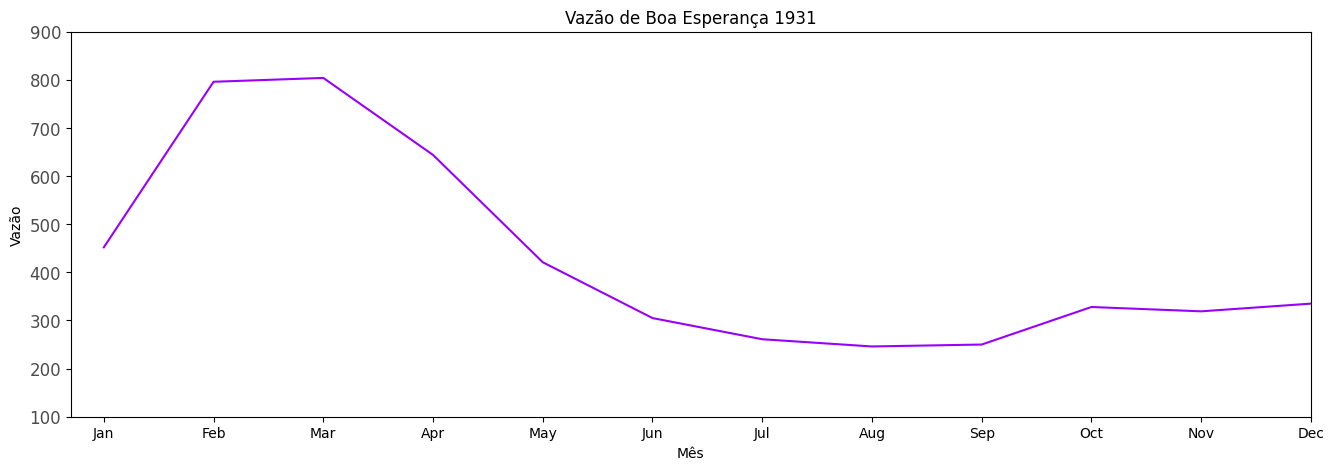

In [15]:
plt.figure(figsize=(16,5))

eixo_x = serie_sazonal.loc[serie_sazonal.ano==anos[0], 'mes']
eixo_y = serie_sazonal.loc[serie_sazonal.ano==anos[0], 'VAZAO']

plt.plot(eixo_x, eixo_y, color=mycolors[0], label=anos[0])

# Exibir gráfico
plt.gca().set(xlim=(-0.3, 11), ylim=(100, 900), ylabel='Vazão', xlabel='Mês')

plt.yticks(fontsize=12, alpha=.7)
plt.title(f"Vazão de Boa Esperança {anos[0]}")
plt.show()

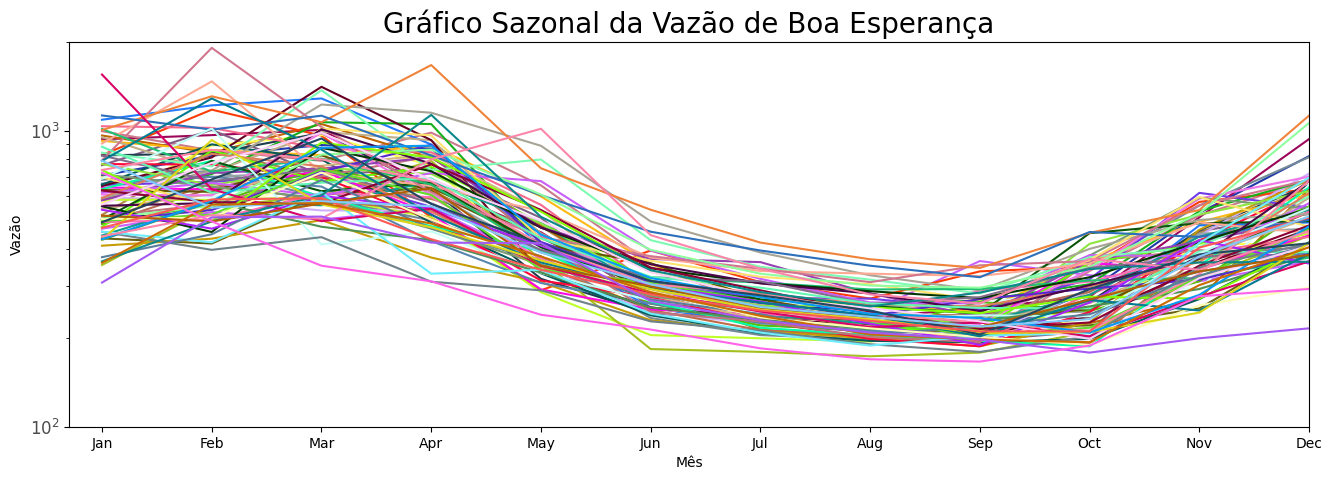

In [16]:
# Desenhar gráfico
plt.figure(figsize=(16,5))
for i, y in enumerate(anos):
  if i > 0:
    eixo_x = serie_sazonal.loc[serie_sazonal.ano==y, 'mes']
    eixo_y = serie_sazonal.loc[serie_sazonal.ano==y, 'VAZAO']

    plt.plot(eixo_x, eixo_y, color=mycolors[i], label=y)
    # plt.text(serie_sazonal.loc[serie_sazonal.ano==y, :].shape[0]-.9, serie_sazonal.loc[serie_sazonal.ano==y, 'VAZAO'][-1:].values[0], y, fontsize=12, color=mycolors[i])

# Exibir gráfico
plt.gca().set(xlim=(-0.3, 11), ylim=(100, 2000), ylabel='Vazão', xlabel='Mês')
plt.yscale('log')  # Usando escala logarítmica no eixo y

plt.yticks(fontsize=12, alpha=.7)
plt.title("Gráfico Sazonal da Vazão de Boa Esperança", fontsize=20)
plt.show()

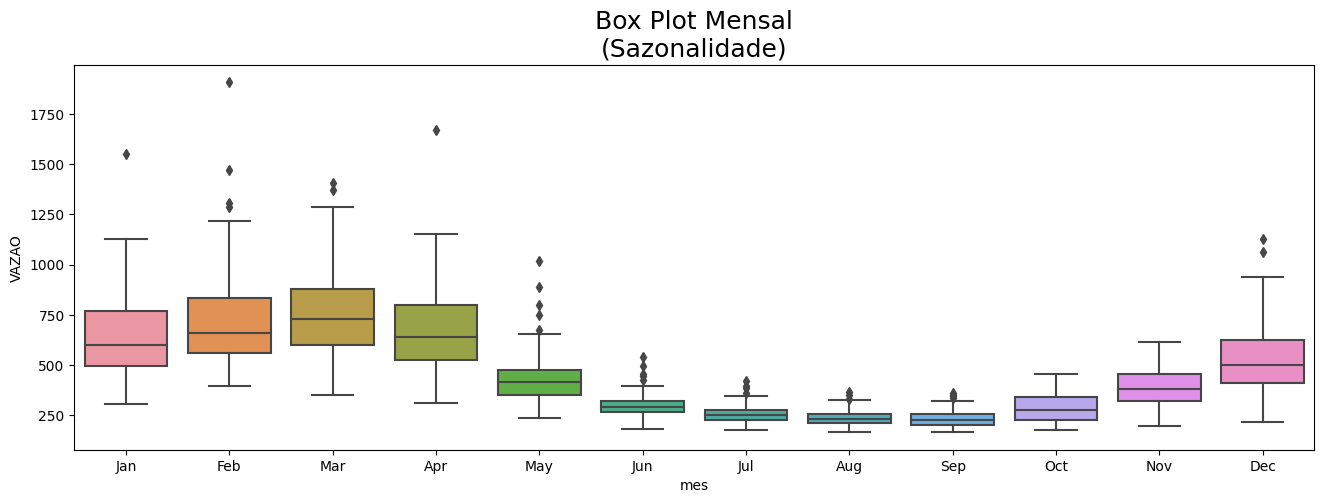

In [17]:
# Desenhar gráfico
plt.figure(figsize=(16,5))
sns.boxplot(x='mes', y='VAZAO', data=serie_sazonal)

# Exibir gráfico
plt.title('Box Plot Mensal\n(Sazonalidade)', fontsize=18)
plt.show()

## TENDÊNCIA

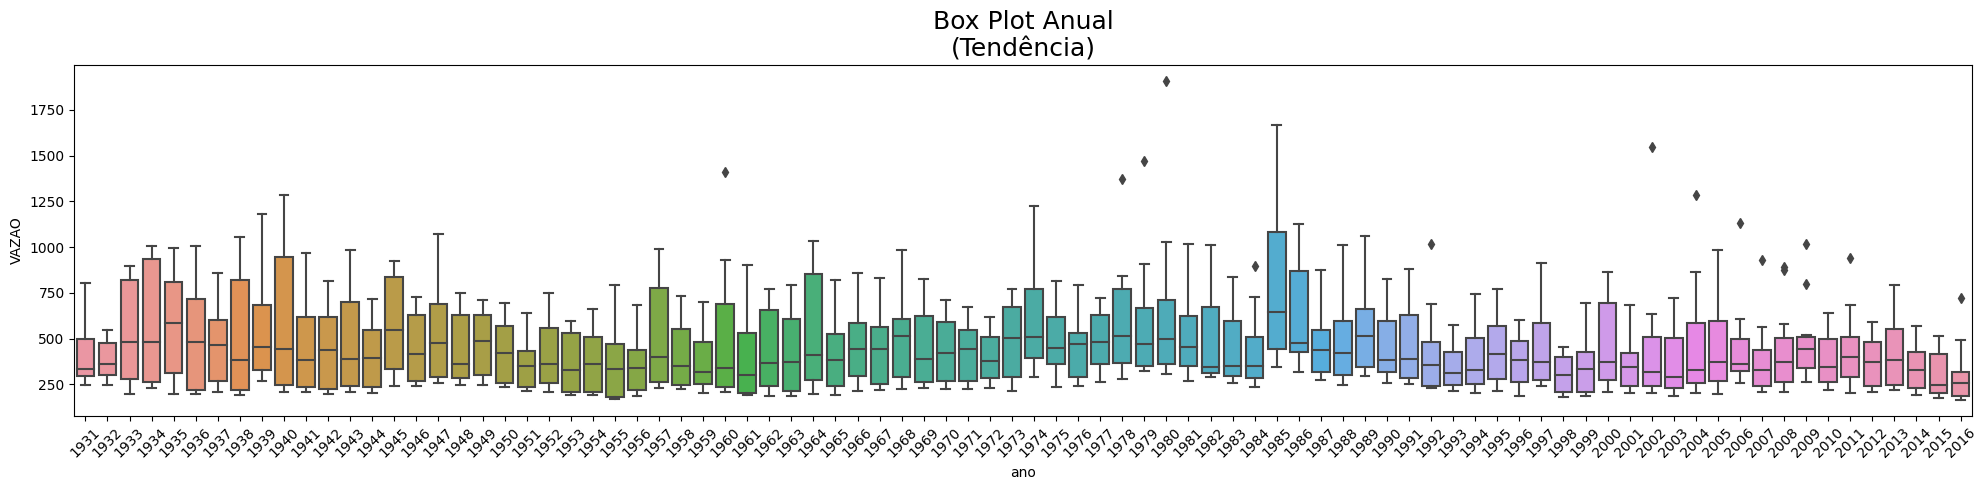

In [18]:
# Aumentar a largura do gráfico
plt.figure(figsize=(20,5))

# Desenhar o boxplot
sns.boxplot(x='ano', y='VAZAO', data=serie_sazonal)

# Configurações do título e dos rótulos
plt.title('Box Plot Anual\n(Tendência)', fontsize=18)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## DECOMPOSIÇÃO DA SÉRIE TEMPORAL

### FUNÇÃO AUXILIAR

In [19]:
def decompor_serie(decomposicao, modelo):
  # Configurar subplots
  plt.figure(figsize=(16, 10))

  # Definir título
  titulo = "Aditiva" if modelo == 'additive' else "Multiplicativa"

  # Título principal do gráfico
  plt.suptitle(f'Decomposição {titulo}', fontsize=22)

  # Plot da série temporal
  plt.subplot(2, 2, 1)
  decomposicao.observed.plot()
  plt.title('Série Temporal', fontsize=18)

  # Plot da Tendência
  plt.subplot(2, 2, 2)
  decomposicao.trend.plot()
  plt.title('Tendência', fontsize=18)

  # Plot da Sazonalidade
  plt.subplot(2, 2, 3)
  decomposicao.seasonal.plot()
  plt.title('Sazonalidade', fontsize=18)

  # Plot dos Resíduos
  plt.subplot(2, 2, 4)
  decomposicao.resid.plot()
  plt.title('Resíduos', fontsize=18)

  # Exibir Gráfico
  plt.tight_layout()
  plt.show()

In [20]:
# Criar um novo DataFrame com a coluna "DATA" como índice
boa_esperanca = serie_sazonal.set_index('DATA').copy()

### DECOMPOSIÇÃO MULTIPLICATIVA

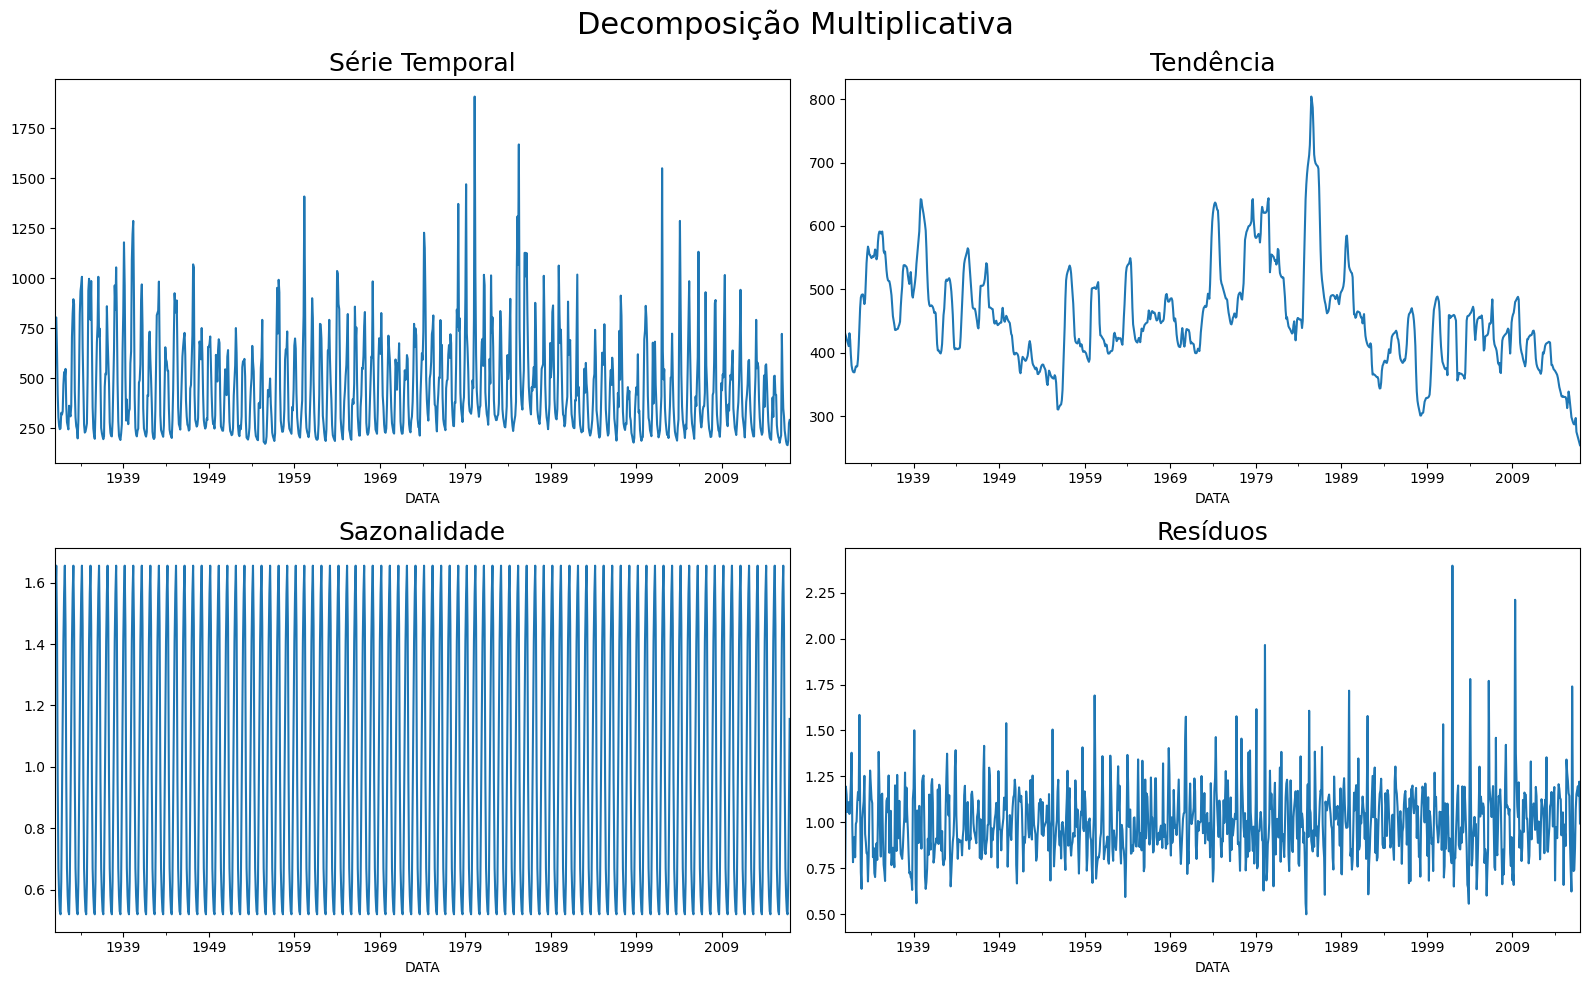

In [21]:
# Decomposição Multiplicativa
result_mul = seasonal_decompose(boa_esperanca['VAZAO'], model='multiplicative', extrapolate_trend='freq')

# Exibir gráfico
decompor_serie(result_mul, 'multiplicative')

### DECOMPOSIÇÃO ADITIVA

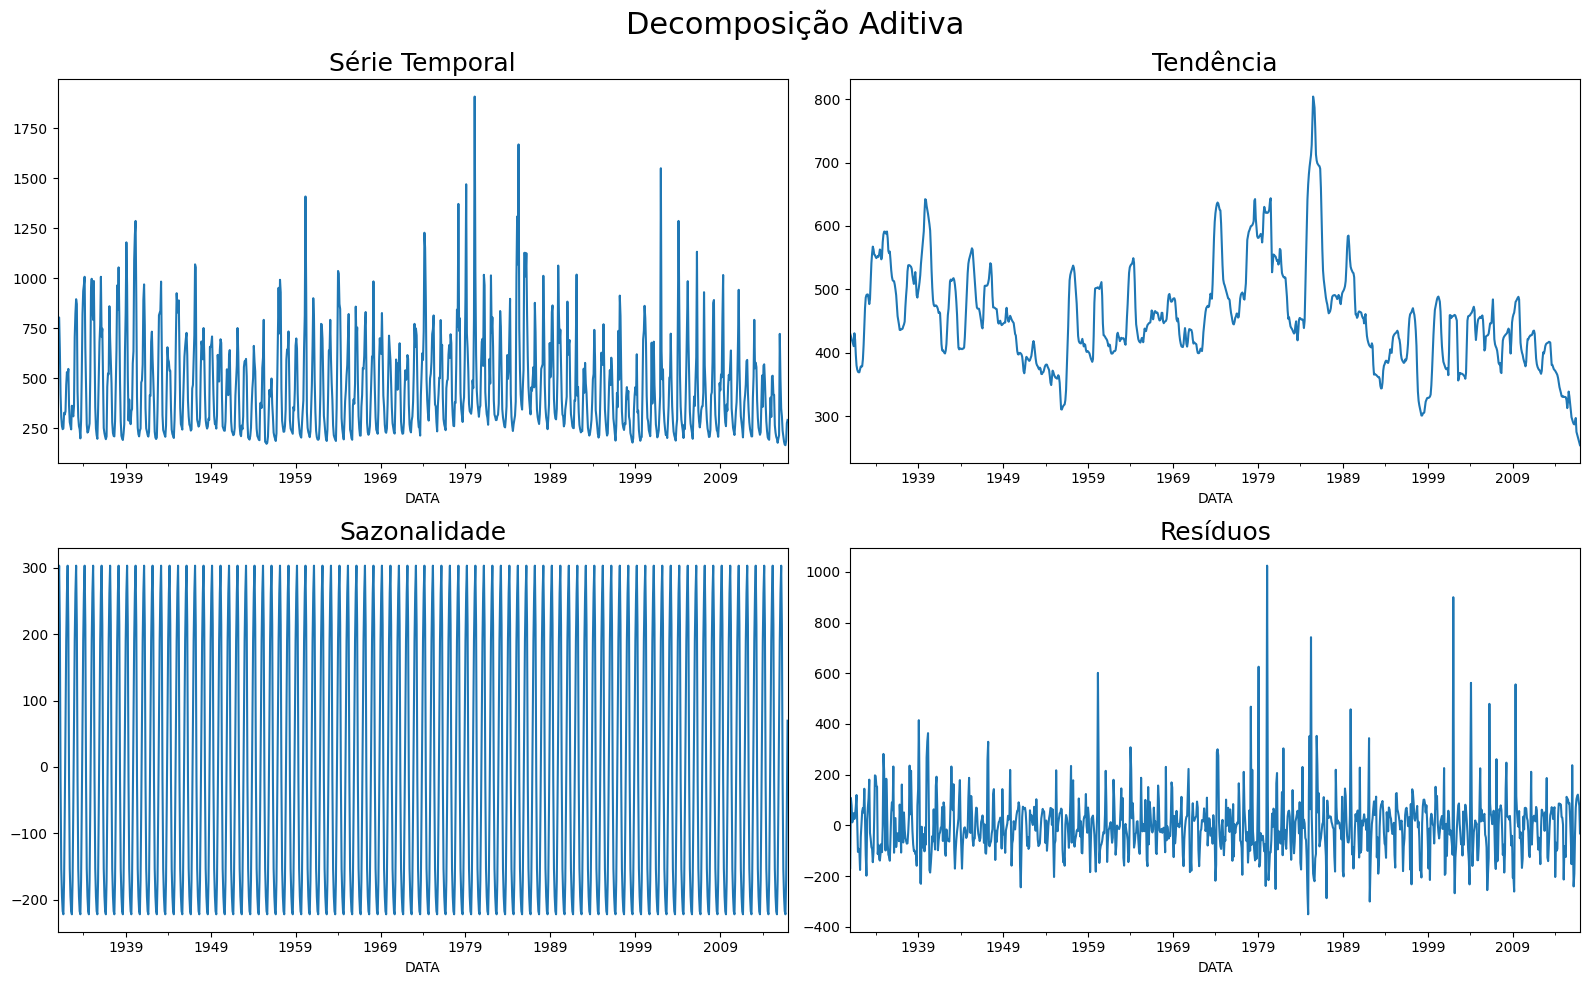

In [22]:
# Decomposição Multiplicativa
result_add = seasonal_decompose(boa_esperanca['VAZAO'], model='additive', extrapolate_trend='freq')

# Exibir gráfico
decompor_serie(result_add, 'additive')

### COMPARAR RESÍDUOS

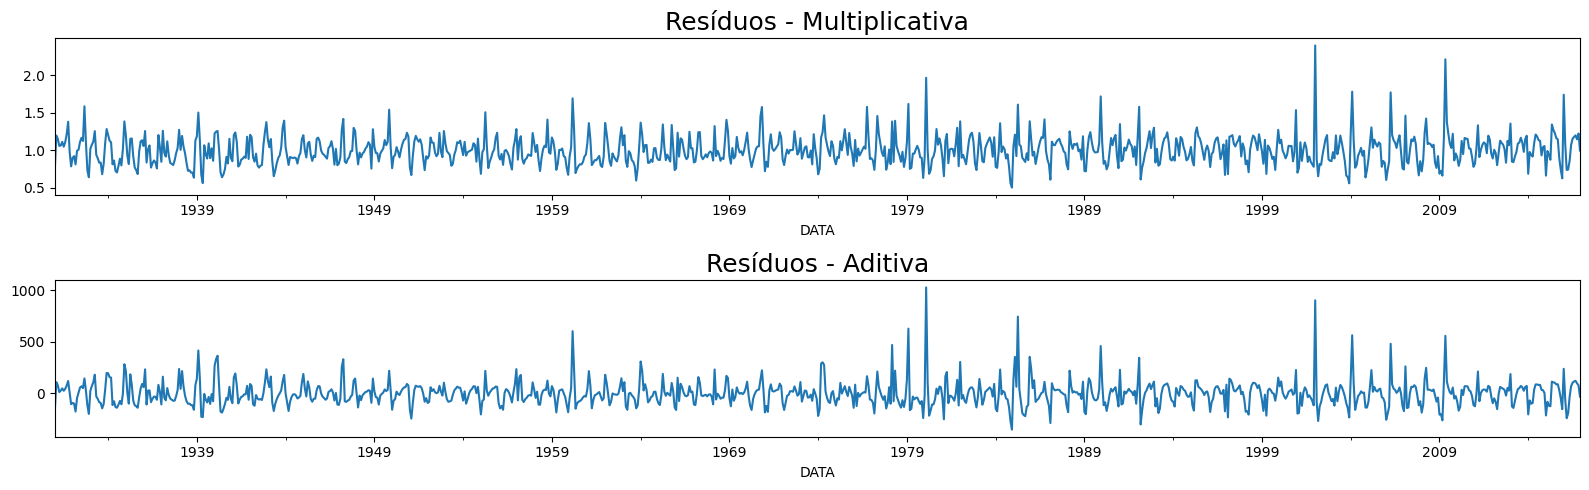

In [23]:
# Configuração dos subplots
fig, axes = plt.subplots(2, 1, figsize=(16, 5))

# Plot dos resíduos - Multiplicativa
result_mul.resid.plot(ax=axes[0])
axes[0].set_title('Resíduos - Multiplicativa', fontsize=18)

# Plot dos resíduos - Aditiva
result_add.resid.plot(ax=axes[1])
axes[1].set_title('Resíduos - Aditiva', fontsize=18)

# Ajustar layout para evitar sobreposição
plt.tight_layout()

# Exibir as figuras
plt.show()

### EXTRAIR OS COMPONENTES

In [24]:
# Vazão = Sazonalidade + Tendência + Resíduo
decomposicao = pd.concat([result_add.seasonal, result_add.trend, result_add.resid, result_add.observed], axis=1)
decomposicao.columns = ['sazonalidade', 'tendencia', 'residuo', 'vazao']
decomposicao.head()

,sazonalidade,tendencia,residuo,vazao
DATA,,,,
1931-01-01,190.498214,430.089355,-168.587569,452.0
1931-02-01,261.688308,426.157974,108.153718,796.0
1931-03-01,303.242258,422.226593,78.531149,804.0
1931-04-01,213.896499,418.295212,11.808289,644.0
1931-05-01,-20.317962,414.363831,26.954131,421.0


# REFERÊNCIAS

- https://www.datacamp.com/tutorial/time-series-analysis-tutorial
- https://www.machinelearningplus.com/time-series/time-series-analysis-python/
- https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/